### <span style="color:crimson;">Automated Model Training & Evaluation: Transitioning from Manual to Efficient Workflows with PyCaret </span>

#### 1. Import Required Module

In [1]:
from pycaret.regression import *

#### 2. Initialize the Setup

In [2]:
import pandas as pd
df = pd.read_csv('merged_data.csv')

regression_setup = setup(
    data=df,                               # Our DataFrame
    target='Hourly Demand Met (in MW)',    # target column
    session_id=42,                         # Sets the seed for all randomness in model training for reproducibility.
    train_size=0.7,                        # 70% training data
    fold_shuffle=False,                    # False to not shuffle the data
    use_gpu=False                          # Optional: Make it True if using LightGBM/XGBoost with GPU
)


,Description,Value
0,Session id,42
1,Target,Hourly Demand Met (in MW)
2,Target type,Regression
3,Original data shape,"(11664, 25)"
4,Transformed data shape,"(11664, 56)"
5,Transformed train set shape,"(8164, 56)"
6,Transformed test set shape,"(3500, 56)"
7,Numeric features,18
8,Categorical features,6
9,Rows with missing values,99.8%


#### 3. Compare All Models
This will train and evaluate all the models and give you the top performers.

In [3]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,14322.5859,319659198.3277,17876.7990,0.1956,0.1026,0.0819,0.6000
knn,K Neighbors Regressor,16124.4600,397881526.4000,19944.8334,-0.0007,0.1143,0.0928,0.4930
et,Extra Trees Regressor,16124.2661,398053542.0574,19949.1272,-0.0011,0.1144,0.0928,4.9250
gbr,Gradient Boosting Regressor,16129.0464,398164530.1486,19951.9275,-0.0014,0.1144,0.0929,2.1750
dt,Decision Tree Regressor,16128.6246,398201407.8355,19952.8713,-0.0015,0.1144,0.0929,0.3160
lightgbm,Light Gradient Boosting Machine,16127.8061,398243489.6146,19953.8991,-0.0016,0.1144,0.0929,3.3820
lr,Linear Regression,16129.0030,398244454.6053,19953.9269,-0.0016,0.1144,0.0929,9.3830
lasso,Lasso Regression,16129.0030,398244454.6053,19953.9269,-0.0016,0.1144,0.0929,0.5020
ridge,Ridge Regression,16129.0030,398244454.5895,19953.9269,-0.0016,0.1144,0.0929,0.6860
en,Elastic Net,16129.0030,398244454.6053,19953.9269,-0.0016,0.1144,0.0929,0.5510


#### 4. Evaluate the Best Model Visually

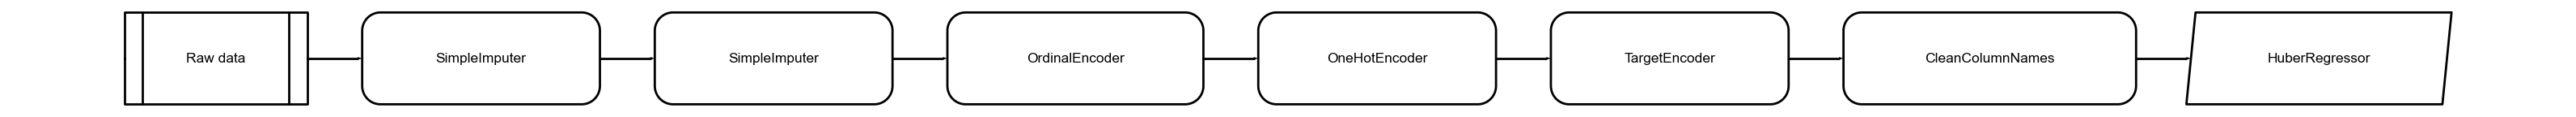

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [4]:
evaluate_model(best_model)

#### 5. Fine-tune the Model

In [5]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13852.9547,294417619.5028,17158.6019,0.2711,0.0982,0.0790
1,13798.1985,300333363.9869,17330.1288,0.2099,0.0992,0.0785
2,13441.7860,279845705.5910,16728.5895,0.3169,0.0961,0.0767
3,13894.8240,303005715.0855,17407.0593,0.2677,0.1001,0.0794
4,13199.8463,279065064.2992,16705.2406,0.2814,0.0956,0.0747
5,13517.2249,279762186.8397,16726.0930,0.3217,0.0964,0.0776
6,14445.2260,332812702.1460,18243.1549,0.1628,0.1036,0.0814
7,13780.2830,295651135.0829,17194.5089,0.2573,0.0979,0.0782
8,13364.1328,277269484.3757,16651.4109,0.2828,0.0953,0.0760


Fitting 10 folds for each of 10 candidates, totalling 100 fits


#### 6. Plot More Insights

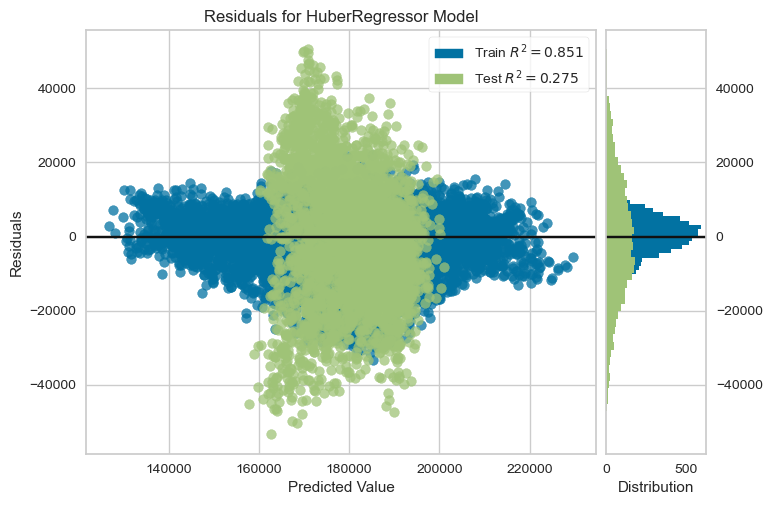

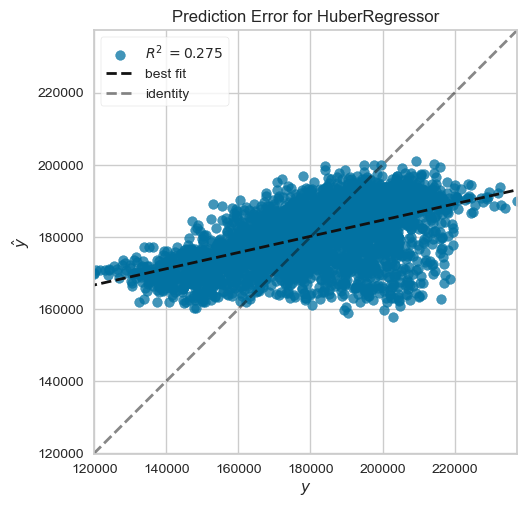

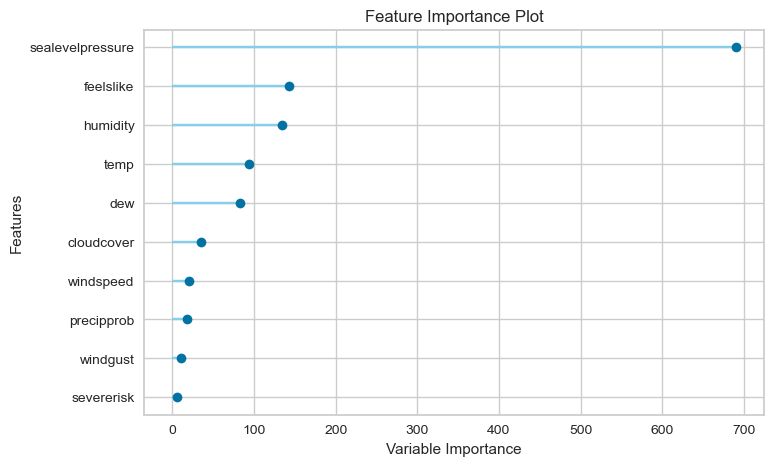

In [6]:
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='error')
plot_model(tuned_model, plot='feature')

#### 7. Predict on Test Data

In [7]:
X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

In [14]:
# Evaluate tuned model on cross-validation folds (training data)
predict_model(tuned_model)

# Finalize the tuned model (train on full training set)
final_model = finalize_model(tuned_model)

# Evaluate finalized model on the test set
X_test = get_config('X_test')

# Ensure it includes all features (optional check)
#print(set(get_config('X_train').columns) - set(X_test.columns))

# Predict on the test set using the finalized model
predictions = predict_model(final_model, data=X_test)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,13622.5723,289995605.8082,17029.2573,0.2748,0.0974,0.0774


,datetime,name,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,prediction_label
5121,2023-08-02 09:00:00,india,32.000000,40.599998,26.0,70.660004,0.0,0,NaN,0,...,50.000000,4.0,288.799988,1.0,3,NaN,Partially cloudy,partly-cloudy-day,"VIDP,42181099999",197653.626687
1845,2023-03-18 21:00:00,india,19.000000,19.000000,18.0,93.930000,0.0,0,NaN,0,...,88.900002,3.0,0.000000,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999",152585.458558
10110,2024-02-26 06:00:00,INDIA,15.000000,15.000000,5.0,51.209999,0.0,0,NaN,0,...,50.000000,3.0,0.000000,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999",169724.319627
3707,2023-06-04 11:00:00,india,31.700001,37.000000,23.5,61.770000,0.0,0,NaN,0,...,88.300003,2.1,733.799988,2.6,7,NaN,Partially cloudy,partly-cloudy-day,"42182099999,VIDP,42139099999,42181099999",186482.831274
7524,2023-11-10 12:00:00,india,22.000000,22.000000,19.0,83.110001,0.0,0,rain,0,...,88.900002,2.0,430.399994,1.5,4,10.0,Partially cloudy,partly-cloudy-day,"VIDP,42181099999",176684.917314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2023-01-17 16:00:00,india,16.000000,16.000000,-5.0,23.250000,0.0,0,NaN,0,...,0.000000,3.0,490.799988,1.8,5,NaN,Clear,clear-day,"VIDP,42181099999",182333.445242
9960,2024-02-20 00:00:00,INDIA,19.000000,19.000000,15.0,77.610001,0.0,0,NaN,0,...,88.900002,2.0,0.000000,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999",162956.500331
4629,2023-07-12 21:00:00,india,28.000000,34.500000,27.0,94.320000,0.0,0,NaN,0,...,50.000000,3.0,0.000000,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999",193562.224347
5022,2023-07-29 06:00:00,india,26.000000,26.000000,26.0,100.000000,0.0,0,NaN,0,...,100.000000,3.0,0.000000,0.0,0,NaN,Overcast,cloudy,"VIDP,42181099999",173078.004573


#### 8. Save the Model

In [11]:
save_model(final_model, 'pycaret_energy_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temp', 'feelslike', 'dew',
                                              'humidity', 'precip', 'precipprob',
                                              'snow', 'snowdepth', 'windgust',
                                              'windspeed', 'winddir',
                                              'sealevelpressure', 'cloudcover',
                                              'visibility', 'solarradiation',
                                              'solarenergy', 'uvindex',
                                              'severerisk'],
                                     transformer=SimpleImputer())),
                 ('categorical_im...
                                     transformer=OneHotEncoder(cols=['preciptype',
                                                                     'conditions',
                                                      

In [16]:
# Extract actual and predicted values
actual_values = y_test
predicted_values = predictions['prediction_label']

# Create a dataframe for actual and predicted values
results_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})

# Save to a CSV file
results_df.to_csv('pycaret_results.csv', index=False)

# Confirm the file has been saved
print("File saved as 'pycaret_results.csv'")

File saved as 'pycaret_results.csv'


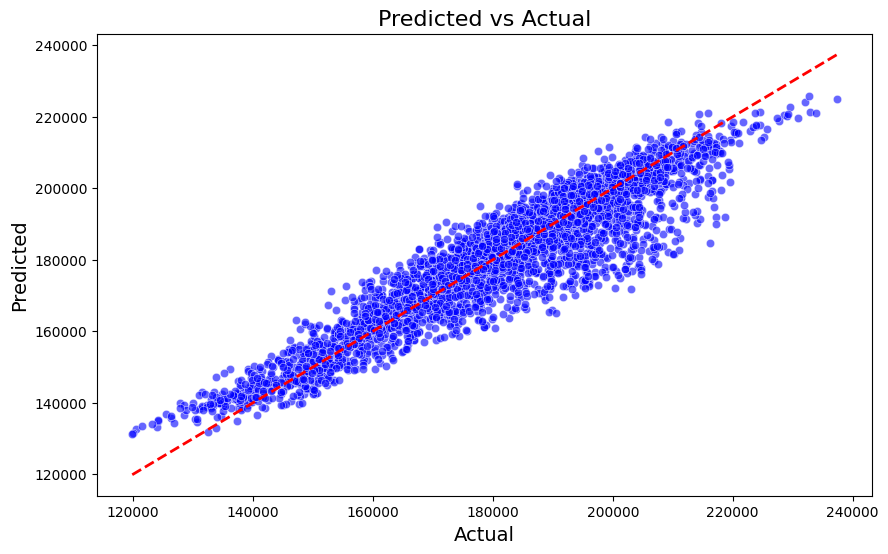

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df = pd.read_csv('pycaret_results.csv')

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', linestyle='--', lw=2)
plt.title('Predicted vs Actual', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.show()


### Comparative Analysis: Manual XGBoost vs PyCaret XGBoost Model

In [2]:
from pycaret.regression import *
import pandas as pd

# Load your data
df = pd.read_csv("merged_data.csv")

# Initialize setup
reg_setup = setup(data=df, 
                  target='Hourly Demand Met (in MW)', 
                  session_id=42, 
                  train_size=0.7, 
                  fold=5, 
                  use_gpu=False)


,Description,Value
0,Session id,42
1,Target,Hourly Demand Met (in MW)
2,Target type,Regression
3,Original data shape,"(11664, 25)"
4,Transformed data shape,"(11664, 56)"
5,Transformed train set shape,"(8164, 56)"
6,Transformed test set shape,"(3500, 56)"
7,Numeric features,18
8,Categorical features,6
9,Rows with missing values,99.8%


In [3]:
# Create the XGBoost Model
xgb_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16047.3438,392235904.0000,19804.9473,-0.0005,0.1137,0.0927
1,16339.6426,412026304.0000,20298.4316,-0.0005,0.1169,0.0947
2,16198.6729,401112000.0000,20027.7812,-0.0000,0.1151,0.0935
3,16173.0840,399354304.0000,19983.8516,-0.0015,0.1140,0.0925
4,15886.1328,386244864.0000,19653.1133,0.0001,0.1123,0.0909
Mean,16128.9752,398194675.2000,19953.6250,-0.0005,0.1144,0.0929
Std,152.8530,8711766.9865,218.0444,0.0006,0.0015,0.0012


In [4]:
# Tune the model
tuned_xgb = tune_model(xgb_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12944.7002,259436096.0000,16107.0205,0.3382,0.0930,0.0745
1,12759.7031,255708432.0000,15990.8857,0.3791,0.0928,0.0737
2,13117.2539,267085152.0000,16342.7402,0.3341,0.0945,0.0755
3,12702.0693,250777472.0000,15835.9551,0.3711,0.0908,0.0724
4,12846.2822,256092032.0000,16002.8760,0.3370,0.0920,0.0735
Mean,12874.0018,257819836.8000,16055.8955,0.3519,0.0926,0.0739
Std,146.6719,5394378.5775,167.5141,0.0191,0.0012,0.0010


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [6]:
# Evaluate performance
evaluate_model(tuned_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
# Finalize the model
final_xgb = finalize_model(tuned_xgb)

# Predict on test set or new data
predictions = predict_model(final_xgb, data=df)  # or new unseen data
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,3431.2131,19418414.0000,4406.6328,0.9513,0.0257,0.0196


,datetime,name,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,Hourly Demand Met (in MW),prediction_label
0,2023-01-01 00:00:00,india,11.0,11.000000,10.0,93.550003,0.0,0,NaN,0,...,2.0,0.000000,0.0,0,NaN,Clear,clear-night,"VIDP,42181099999",138212.796875,144373.593750
1,2023-01-01 01:00:00,india,10.0,9.600000,9.0,93.500000,0.0,0,NaN,0,...,2.0,0.000000,0.0,0,NaN,Clear,clear-night,"VIDP,42181099999",134620.734375,141820.093750
2,2023-01-01 02:00:00,india,8.6,8.600000,7.6,93.830002,0.0,0,NaN,0,...,1.2,0.000000,0.0,0,NaN,Clear,clear-night,"42182099999,VIDP,42181099999",131384.796875,139770.484375
3,2023-01-01 03:00:00,india,10.0,10.000000,9.0,93.500000,0.0,0,NaN,0,...,2.0,0.000000,0.0,0,NaN,Clear,clear-night,"VIDP,42181099999",130602.468750,139446.046875
4,2023-01-01 04:00:00,india,9.0,8.500000,9.0,100.000000,0.0,0,NaN,0,...,1.0,0.000000,0.0,0,NaN,Clear,clear-night,"VIDP,42181099999",133288.968750,141808.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11659,2024-04-30 19:00:00,india,32.0,29.799999,-3.0,10.320000,0.0,0,NaN,0,...,4.0,130.600006,0.5,0,NaN,Clear,clear-night,"VIDP,42181099999",201094.234375,196998.593750
11660,2024-04-30 20:00:00,india,29.6,28.299999,9.6,28.780001,0.0,0,NaN,0,...,4.0,6.500000,0.0,0,NaN,Clear,clear-night,"42182099999,VIDP,42181099999",196577.703125,193406.593750
11661,2024-04-30 21:00:00,india,30.0,28.200001,4.0,19.180000,0.0,0,NaN,0,...,4.0,0.000000,0.0,0,NaN,Clear,clear-night,"VIDP,42181099999",194782.125000,192114.578125
11662,2024-04-30 22:00:00,india,29.0,27.500000,4.0,20.320000,0.0,0,NaN,0,...,4.0,0.000000,0.0,0,NaN,Clear,clear-night,"VIDP,42181099999",194967.390625,191381.875000


In [ ]:
# Save the model
save_model(final_xgb, 'pycaret_xgboost_model')

### 📊 Performance Comparison: Manual XGBoost vs PyCaret XGBoost

| Metric      | Manual XGBoost | PyCaret XGBoost |
|-------------|----------------|-----------------|
| **MAE**     | 2125.12        | 3431.2131       |
| **RMSE**    | 2815.2927      | 4406.6328       |
| **R² Score**| 0.9725         | 0.9513          |
| **MSE**     | —              | 19418414.0000   |
| **RMSLE**   | —              | 0.0257          |
| **MAPE**    | —              | 0.0196          |

---

### 🔎 Key Observations:

- ✅ The **manually trained XGBoost model** outperforms the PyCaret model in all common metrics (MAE, RMSE, and R²).
- 📉 PyCaret’s model shows slightly weaker predictive power, possibly due to:
  - Generic preprocessing pipeline
  - Broader and default hyperparameter search space
- 📈 The manual model benefits from **custom feature engineering and tailored tuning**, leading to significantly better performance.



### ✅ Final Conclusion

This comparison clearly demonstrates the value of **manual model development**—from curated data preprocessing to custom hyperparameter tuning—in delivering a more optimized and accurate XGBoost model for energy consumption forecasting. 

While PyCaret offers a fast and automated baseline, **manual tuning unlocks superior performance** tailored to the problem domain. The additional effort in manual modeling directly translates to improved metrics and a deeper understanding of the data dynamics.

> **"Automation can accelerate the journey, but craftsmanship defines the destination."**

This reinforces our project’s approach: balancing the speed of automation with the precision of manual intervention to achieve the most reliable and actionable predictions.
